In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('T3.Credit Approval.csv', header=None)  # 加载数据集
data.head() # 打印数据集


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43,560.0,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120,0.0,+


In [3]:
print("shape of the data:", data.shape)
print("-----------------------------------------")
print(data.info())

shape of the data: (695, 16)
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       693 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    float64
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    float64
 15  15      690 non-null    object 
dtypes: float64(4), object(12)
memory usage: 87.0+ KB
None


In [4]:
#这里因为Age是object，所以转换后数据不准确了，所以需要在最开始的时候就将age进行转化为num
#但在使用语句data[1] = pd.to_numeric(data[1])因为存在？的数据而报错，所以把？替换为Nan的语句放到前面
data.replace('?', np.NaN, inplace = True) 
data[1] = pd.to_numeric(data[1])

data2 = data.copy()

In [5]:
data_description = data.describe()  #数据的统计量信息
print(data_description)

#首先，我们将使用describe() 函数查看连续型数值的描述性统计信息，例如最小值、最大值、平均值和标准差
#显示列2、7、10、14分别代表Debt(债务)、YearsEmployed(工作年限)、CreditScore(信用评分)、Income(收入)

               1           2           7          10             14
count  678.000000  690.000000  690.000000  690.00000     690.000000
mean    31.568171    4.758725    2.223406    2.40000    1017.385507
std     11.957862    4.978163    3.346513    4.86294    5210.102598
min     13.750000    0.000000    0.000000    0.00000       0.000000
25%     22.602500    1.000000    0.165000    0.00000       0.000000
50%     28.460000    2.750000    1.000000    0.00000       5.000000
75%     38.230000    7.207500    2.625000    3.00000     395.500000
max     80.250000   28.000000   28.500000   67.00000  100000.000000


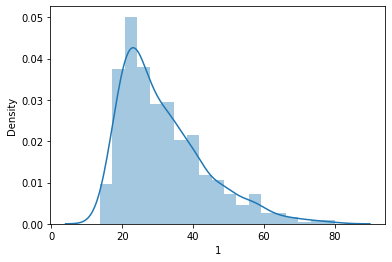

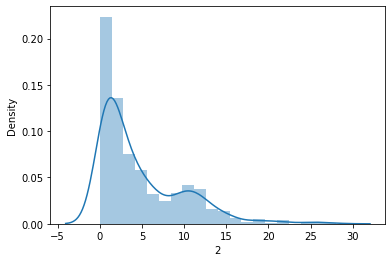

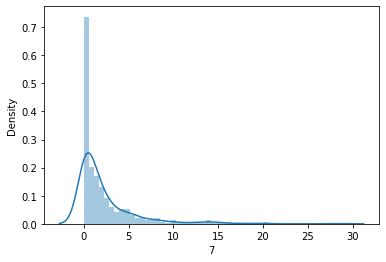

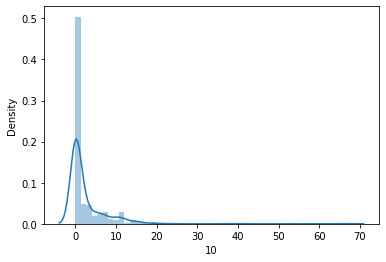

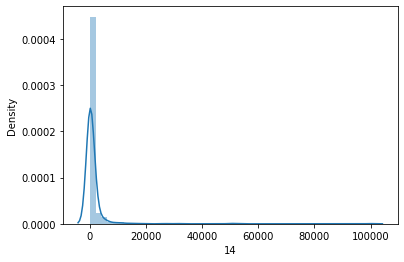

In [6]:
#灵活绘制观察的单变量分布 
def plotDistPlot(col):
    sns.distplot(col)
    plt.show()
plotDistPlot(data[1]) #Age(年龄)
plotDistPlot(data[2]) #Debt(债务)
plotDistPlot(data[7]) #YearsEmployed(工作年限)
plotDistPlot(data[10]) #CreditScore(信用评分)
plotDistPlot(data[14]) #Income(收入)

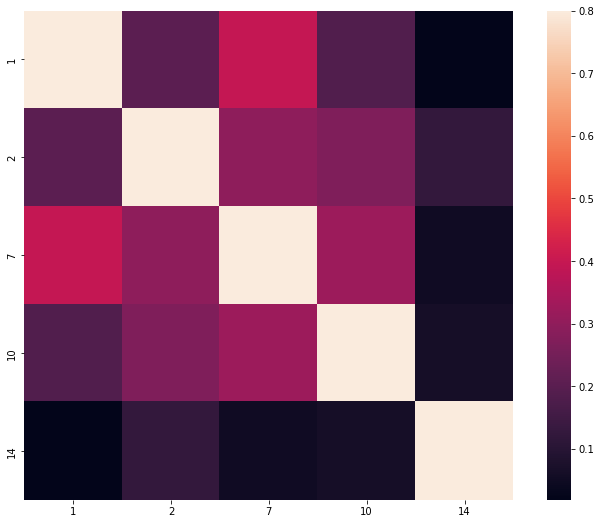

In [7]:
#协方差矩阵
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

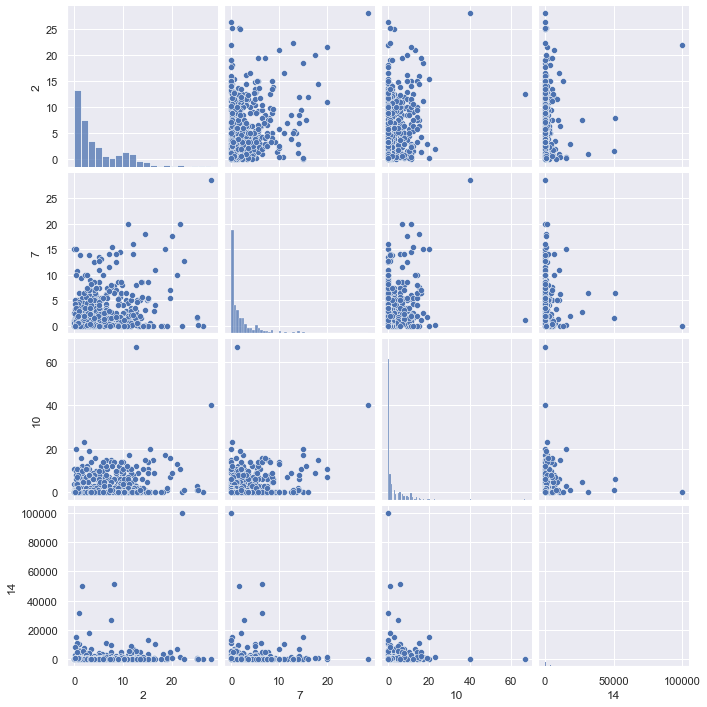

In [8]:
#散点图
sns.set()
cols = [2,7,10,14]
sns.pairplot(data[cols], size = 2.5)
plt.show();

<AxesSubplot:xlabel='15', ylabel='count'>

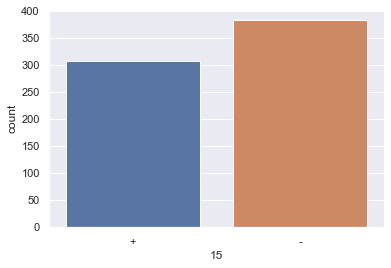

In [9]:
#查看结果的比例
sns.countplot(data = data, x = 15)

In [10]:
print(data.tail(17)) #查看缺失值是怎么样的，可以看到缺失值被标记为‘？’
print("----------------------------------------------------")
data = data.replace('?', np.nan) # 用NaN替换‘？’
print(data.tail(17)) #再一次查看处理后的缺失值

#我们可以从摘要输出中看到，0列Male变量有缺失值，为‘？’，我们可以简单地使用所有现有值的平均值来完成。另一种方法是检查数值之间的关系并使用线性回归来填充它们。

      0      1       2  3  4   5   6      7  8  9     10 11 12   13     14 15
678  NaN  29.50   2.000  y  p   e   h  2.000  f  f   0.0  f  g  256   17.0  -
679    a  37.33   2.500  u  g   i   h  0.210  f  f   0.0  f  g  260  246.0  -
680    a  41.58   1.040  u  g  aa   v  0.665  f  f   0.0  f  g  240  237.0  -
681    a  30.58  10.665  u  g   q   h  0.085  f  t  12.0  t  g  129    3.0  -
682    b  19.42   7.250  u  g   m   v  0.040  f  t   1.0  f  g  100    1.0  -
683    a  17.92  10.210  u  g  ff  ff  0.000  f  f   0.0  f  g    0   50.0  -
684    a  20.08   1.250  u  g   c   v  0.000  f  f   0.0  f  g    0    0.0  -
685    b  19.50   0.290  u  g   k   v  0.290  f  f   0.0  f  g  280  364.0  -
686    b  27.83   1.000  y  p   d   h  3.000  f  f   0.0  f  g  176  537.0  -
687    b  17.08   3.290  u  g   i   v  0.335  f  f   0.0  t  g  140    2.0  -
688    b  36.42   0.750  y  p   d   v  0.585  f  f   0.0  f  g  240    3.0  -
689    b  40.58   3.290  u  g   m   v  3.500  f  f   0.0  t  s  

In [11]:
data.fillna(data.mean(), inplace=True) # 用均值插补来插补缺失值
print(data.isnull().values.sum())# 统计数据集中NaN的个数进行验证
print(data.tail(15))

107
    0      1       2  3  4   5   6      7  8  9     10 11 12   13     14 15
680  a  41.58   1.040  u  g  aa   v  0.665  f  f   0.0  f  g  240  237.0  -
681  a  30.58  10.665  u  g   q   h  0.085  f  t  12.0  t  g  129    3.0  -
682  b  19.42   7.250  u  g   m   v  0.040  f  t   1.0  f  g  100    1.0  -
683  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0.0  f  g    0   50.0  -
684  a  20.08   1.250  u  g   c   v  0.000  f  f   0.0  f  g    0    0.0  -
685  b  19.50   0.290  u  g   k   v  0.290  f  f   0.0  f  g  280  364.0  -
686  b  27.83   1.000  y  p   d   h  3.000  f  f   0.0  f  g  176  537.0  -
687  b  17.08   3.290  u  g   i   v  0.335  f  f   0.0  t  g  140    2.0  -
688  b  36.42   0.750  y  p   d   v  0.585  f  f   0.0  f  g  240    3.0  -
689  b  40.58   3.290  u  g   m   v  3.500  f  f   0.0  t  s  400    0.0  -
690  b  21.08  10.085  y  p   e   h  1.250  f  f   0.0  f  g  260    0.0  -
691  a  22.67   0.750  u  g   c   v  2.000  f  t   2.0  t  g  200  394.0  -
692  a  

In [12]:
for col in data.columns: #遍历data的每一列
    if data[col].dtypes == 'object': # 检查列是否为对象类型
        data= data.fillna(data[col].value_counts().index[0]) # 用频次最高的值进行插补

print(data.isnull().values.sum())#计算数据集中的 NaN 数量并打印进行验证
print(data.tail(15))

0
    0      1       2  3  4   5   6      7  8  9     10 11 12   13     14 15
680  a  41.58   1.040  u  g  aa   v  0.665  f  f   0.0  f  g  240  237.0  -
681  a  30.58  10.665  u  g   q   h  0.085  f  t  12.0  t  g  129    3.0  -
682  b  19.42   7.250  u  g   m   v  0.040  f  t   1.0  f  g  100    1.0  -
683  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0.0  f  g    0   50.0  -
684  a  20.08   1.250  u  g   c   v  0.000  f  f   0.0  f  g    0    0.0  -
685  b  19.50   0.290  u  g   k   v  0.290  f  f   0.0  f  g  280  364.0  -
686  b  27.83   1.000  y  p   d   h  3.000  f  f   0.0  f  g  176  537.0  -
687  b  17.08   3.290  u  g   i   v  0.335  f  f   0.0  t  g  140    2.0  -
688  b  36.42   0.750  y  p   d   v  0.585  f  f   0.0  f  g  240    3.0  -
689  b  40.58   3.290  u  g   m   v  3.500  f  f   0.0  t  s  400    0.0  -
690  b  21.08  10.085  y  p   e   h  1.250  f  f   0.0  f  g  260    0.0  -
691  a  22.67   0.750  u  g   c   v  2.000  f  t   2.0  t  g  200  394.0  -
692  a  25

In [13]:
from sklearn.preprocessing import LabelEncoder #导入标签编码器
le = LabelEncoder() # 实例化

for col in data: # 迭代每列的所有值并提取它们的数据类型
    if data[col].dtype=='object': # 判断数据类型是否为对象类型
        data[col]=le.fit_transform(data[col]) #使用LabelEncoder做数值变换
data.tail(15)

#这里因为Age是object，所以转换后数据不准确了，所以需要在最开始的时候就将age进行转化为num
#但在使用语句data[1] = pd.to_numeric(data[1jiu ])因为存在？的数据而报错，所以把？替换为Nan的语句放到前面
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [16]:
from sklearn.model_selection import train_test_split 
#去掉特征 11 和 13 并将 DataFrame 转换为 NumPy 数组
data = data.drop([11, 13], axis=1)  
data = data.values
#将特征和标签分离到单独的变量中
X,y = data[:,0:13] , data[:,13] 
# 分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)


In [45]:
#PCA降维代码
'''
from __future__ import division
from sklearn.preprocessing import MinMaxScaler, StandardScaler

class PCApercent(object):
    def __init__(self, X, percentage):
        self.X = X
        self.percentage = percentage
        self.variance_ratio = []
        self.low_dataMat = []

    
    def percent2n(self, eigVal): # 通过方差百分比选取前n个主成分
        sortVal = np.sort(eigVal)[-1::-1]
        percentSum, componentNum = 0, 0
        for i in sortVal:
            percentSum += i
            componentNum += 1
            if percentSum >= sum(sortVal) * self.percentage:
                break
        return componentNum

    def _fit(self): 
        X_mean = np.mean(self.X, axis=0)
        dataMat = self.X - X_mean
        covMat = np.cov(dataMat, rowvar=False)

        eigVal, eigVect = np.linalg.eig(np.mat(covMat))
        minMax = MinMaxScaler()
        eigVect = minMax.fit_transform(eigVect)

        n = self.percent2n(eigVal)
        eigValInd = np.argsort(eigVal)
        eigValInd = eigValInd[-1:-(n + 1):-1]
        n_eigVect = eigVect[:, eigValInd]
        self.low_dataMat = dataMat * n_eigVect
        [self.variance_ratio.append(eigVect[i] / sum(eigVal)) for i in eigValInd]
        return self.low_dataMat
        
        
    def fit(self): 
        self._fit()
        return self
    
    def show(self): #画碎石图 
        X_mean = np.mean(self.X, axis=0)
        dataMat = self.X - X_mean
        covMat = np.cov(dataMat, rowvar=False)
        eigVal, eigVect = np.linalg.eig(np.mat(covMat))
        
        id = np.linspace(1, dataMat.shape[1], dataMat.shape[1])
        explained_ratio = []
        acc_explained_ratio = []
        for i in np.argsort(-eigVal):
            explained_ratio.append(eigVal[i] / sum(eigVal))
            acc_explained_ratio.append(sum(eigVal[:i+1])/sum(eigVal))                          
        plt.plot(id, explained_ratio, 'c.-', label='explained_ratio')
        plt.plot(id, acc_explained_ratio, label='acc_explained_ratio')
        plt.legend()
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.grid()
        return plt.show


#打印原始数据集
data = np.mat(pd.DataFrame(X))
print("Original dataset = {}*{}".format(data.shape[0], data.shape[1]))
#进行PCA降维
pca = PCApercent(data,0.999999) #方差解释率要求为99.9999%
pca.fit() 
X = pca.low_dataMat #将得到降维后的数据还是存储到X
print(X.shape)
#方差解释率碎石图可视化
pca.show()


'''

'\nfrom __future__ import division\nfrom sklearn.preprocessing import MinMaxScaler, StandardScaler\n\nclass PCApercent(object):\n    def __init__(self, X, percentage):\n        self.X = X\n        self.percentage = percentage\n        self.variance_ratio = []\n        self.low_dataMat = []\n\n    \n    def percent2n(self, eigVal): # 通过方差百分比选取前n个主成分\n        sortVal = np.sort(eigVal)[-1::-1]\n        percentSum, componentNum = 0, 0\n        for i in sortVal:\n            percentSum += i\n            componentNum += 1\n            if percentSum >= sum(sortVal) * self.percentage:\n                break\n        return componentNum\n\n    def _fit(self): \n        X_mean = np.mean(self.X, axis=0)\n        dataMat = self.X - X_mean\n        covMat = np.cov(dataMat, rowvar=False)\n\n        eigVal, eigVect = np.linalg.eig(np.mat(covMat))\n        minMax = MinMaxScaler()\n        eigVect = minMax.fit_transform(eigVect)\n\n        n = self.percent2n(eigVal)\n        eigValInd = np.argsort(eigV

In [17]:
print(data)
print(data.shape)
print(type(data))

[[2.000e+00 3.083e+01 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 5.867e+01 4.460e+00 ... 1.000e+00 5.600e+02 0.000e+00]
 [1.000e+00 2.450e+01 5.000e-01 ... 1.000e+00 8.240e+02 0.000e+00]
 ...
 [1.000e+00 2.525e+01 1.350e+01 ... 1.000e+00 1.000e+00 1.000e+00]
 [2.000e+00 1.792e+01 2.050e-01 ... 1.000e+00 7.500e+02 1.000e+00]
 [2.000e+00 3.500e+01 3.375e+00 ... 1.000e+00 0.000e+00 1.000e+00]]
(695, 14)
<class 'numpy.ndarray'>


In [18]:

print('训练样本',len(X_train),X_train.shape)
print('测试样本',len(X_test),X_test.shape)
print('训练样本',len(y_train),y_train.shape)
print('测试样本',len(y_test),y_test.shape)
print('总',len(X_train)+len(X_test))


训练样本 465 (465, 13)
测试样本 230 (230, 13)
训练样本 465 (465,)
测试样本 230 (230,)
总 695


In [19]:
#https://blog.51cto.com/u_15072918/2580389 
from sklearn.preprocessing import MinMaxScaler

#实例化 MinMaxScaler 并使用它重新缩放 X_train 和 X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

print(data)


[[2.000e+00 3.083e+01 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 5.867e+01 4.460e+00 ... 1.000e+00 5.600e+02 0.000e+00]
 [1.000e+00 2.450e+01 5.000e-01 ... 1.000e+00 8.240e+02 0.000e+00]
 ...
 [1.000e+00 2.525e+01 1.350e+01 ... 1.000e+00 1.000e+00 1.000e+00]
 [2.000e+00 1.792e+01 2.050e-01 ... 1.000e+00 7.500e+02 1.000e+00]
 [2.000e+00 3.500e+01 3.375e+00 ... 1.000e+00 0.000e+00 1.000e+00]]


In [57]:

'''
# 使用sklearn中的KNN算法
# 导入KNN算法的库
from sklearn.neighbors import KNeighborsClassifier

maxK=101
rate_set2 = []
for k in range(1,maxK): #迭代K
    if k % 2 == 1:
        # 创建KNN对象，进行训练与测试
        kclf = KNeighborsClassifier(n_neighbors=k)
        # 将训练样本点数据添加至KNN算法对象进行训练
        kclf.fit(X_train,y_train)
        # 进行测试获得测试的结果
        result2 = kclf.score(X_test, y_test)
        rate_set2.append(result2)

# print(rate_set2)
max_acc2 = np.max(rate_set2)  # max value index
min_acc2 = np.min(rate_set2)  # min value index
mean_acc2 = np.mean(rate_set2)  # mean
var_acc2 = np.var(rate_set2) #var
print('最高准确率:',max_acc2, '最低准确率:', min_acc2,'平均准确率:', mean_acc2,'方差:',var_acc2)

plt.figure()
plt.plot(range(1,maxK,2) , rate_set2, color="black",lw=1.5)
plt.grid(True)
plt.title("KNN Accuracy ")
plt.xlabel("Number of K")
plt.ylabel("Accuracy")
plt.show()
'''

'\n# 使用sklearn中的KNN算法\n# 导入KNN算法的库\nfrom sklearn.neighbors import KNeighborsClassifier\n\nmaxK=101\nrate_set2 = []\nfor k in range(1,maxK): #迭代K\n    if k % 2 == 1:\n        # 创建KNN对象，进行训练与测试\n        kclf = KNeighborsClassifier(n_neighbors=k)\n        # 将训练样本点数据添加至KNN算法对象进行训练\n        kclf.fit(X_train,y_train)\n        # 进行测试获得测试的结果\n        result2 = kclf.score(X_test, y_test)\n        rate_set2.append(result2)\n\n# print(rate_set2)\nmax_acc2 = np.max(rate_set2)  # max value index\nmin_acc2 = np.min(rate_set2)  # min value index\nmean_acc2 = np.mean(rate_set2)  # mean\nvar_acc2 = np.var(rate_set2) #var\nprint(\'最高准确率:\',max_acc2, \'最低准确率:\', min_acc2,\'平均准确率:\', mean_acc2,\'方差:\',var_acc2)\n\nplt.figure()\nplt.plot(range(1,maxK,2) , rate_set2, color="black",lw=1.5)\nplt.grid(True)\nplt.title("KNN Accuracy ")\nplt.xlabel("Number of K")\nplt.ylabel("Accuracy")\nplt.show()\n'

最高准确率: 0.7304347826086957 , k =  3 , 最低准确率: 0.6869565217391305 , k =  65 ,平均准确率: 0.704434782608696 ,方差: 0.0001614291115311912


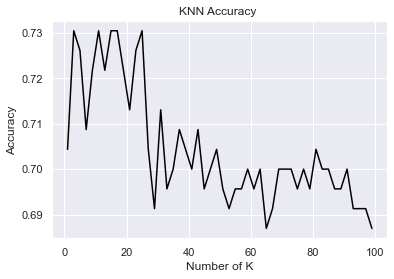

In [44]:
y_train = [int(i) for i in y_train]
y_test = [int(i) for i in y_test]

class KNN1:
    #初始化方法，k表示邻居的个数
    def __init__(self, k): 
        #用当前的k来初始化KNN1对象中的k
        self.k = k   

    # X: 训练集样本，类数组类型； y：训练集标签，类数组类型
    def fit(self, X, y):   
        # 把X,y转化成ndarray数组类型
        self.X = np.asarray(X)  
        self.y = np.asarray(y)

    #  根据参数传递的样本，对测试集样本进行预测。X: 训练集样本，类数组类型；
    def predict(self,X):  
        X = np.array(X)
        # 储存预测的结果，数组类型 
        result = [] 
        # 对ndarray数组进行遍历，每次取数组中的一行。
        for x in X:
            # 求测试集中的每个样本与训练集中所有点的距离。
            # x代表测试集中的一行，X代表训练集中的所有行。ndarray数组可以自己广播扩展然后对位运算。
            dis = np.sqrt(np.sum((x - self.X) ** 2,axis=1))
            # argsort可以将数组排序后，每个元素在原数组中的索引位置。
            index = dis.argsort()
            # 进行截断，只取前k个元素【取距离最近的k个元素的索引】
            index = index[:self.k]
            # 返回数组中每个元素出现的次数。元素必须是非负的整数。
            count = np.bincount(self.y[index])
            #  返回ndarray数组中，值最大的元素对应的索引，该索引就是预测判定的类别。
            result.append(count.argmax())
        return np.asarray(result)

rate_set = [] 
maxK = 101 #控制K的大小
for k in range(1,maxK): #迭代K
    if k % 2 == 1:   
        knn = KNN1(k)  # 创建KNN对象     
        knn.fit(X_train,y_train)  # 进行训练    
        result = knn.predict(X_test) # 进行测试，获得测试的结果
        accRate = np.sum(result == y_test)/len(result) # 计算正确率
        rate_set.append(accRate) #添加到list

# print(rate_set) 
max_acc = np.max(rate_set)  # max value index
min_acc = np.min(rate_set)  # min value index
mean_acc = np.mean(rate_set)  # mean
var_acc = np.var(rate_set) #var
# max_index = rate_set.index(max_acc) a.index(max(a)
print('最高准确率:',max_acc,', k = ', 2* (rate_set.index(max_acc)+1) - 1, ', 最低准确率:', min_acc,', k = ', 2* (rate_set.index(min_acc)+1) - 1, ',平均准确率:', mean_acc,',方差:',var_acc)

plt.figure()
plt.plot(range(1,maxK,2), rate_set, color="black",lw=1.5)
plt.grid(True)
plt.title("KNN Accuracy ")
plt.xlabel("Number of K")
plt.ylabel("Accuracy")
plt.show()

# # print("Your input is:", y_test , "and classified to class: ", result, "It is:",result == y_test)
# print("Total:",len(result),", True:",np.sum(result == y_test),", False:",len(result)-np.sum(result == y_test))
# print("rate:",np.sum(result == y_test)/len(result))

In [ ]:
rescaledX = scaler.transform(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, y_test))

# 评估confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# 打印特征排名
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# 绘制森林的特征重要性
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
#哪个属性在信用卡请求决策中发挥了最重要的作用？
#前面已经复制过data2
data2 = data2.drop([15], axis=1)

features = data2.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
###########将逻辑回归模型拟合到训练集
######http://localhost:8877/notebooks/2020_05_31_02_Predicting_Credit_Card_Approvals.ipynb
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test, y_pred))

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

In [53]:
#KNN-kd tree算法
# -*- coding: utf-8 -*-l
import random
from copy import deepcopy
from time import time
import numpy as np
from numpy.linalg import norm
from collections import Counter

Counter([0, 1, 1, 2, 2, 3, 3, 4, 3, 3]).most_common(1)


def partition_sort(arr, k, key=lambda x: x):
    """
    以枢纽(位置k)为中心将数组划分为两部分, 枢纽左侧的元素不大于枢纽右侧的元素

    :param arr: 待划分数组
    :param p: 枢纽前部元素个数
    :param key: 比较方式
    :return: None
    """
    start, end = 0, len(arr) - 1
    assert 0 <= k <= end
    while True:
        i, j, pivot = start, end, deepcopy(arr[start])
        while i < j:
            # 从右向左查找较小元素
            while i < j and key(pivot) <= key(arr[j]):
                j -= 1
            if i == j: break
            arr[i] = arr[j]
            i += 1
            # 从左向右查找较大元素
            while i < j and key(arr[i]) <= key(pivot):
                i += 1
            if i == j: break
            arr[j] = arr[i]
            j -= 1
        arr[i] = pivot

        if i == k:
            return
        elif i < k:
            start = i + 1
        else:
            end = i - 1


def max_heapreplace(heap, new_node, key=lambda x: x[1]):
    """
    大根堆替换堆顶元素

    :param heap: 大根堆/列表
    :param new_node: 新节点
    :return: None
    """
    heap[0] = new_node
    root, child = 0, 1
    end = len(heap) - 1
    while child <= end:
        if child < end and key(heap[child]) < key(heap[child + 1]):
            child += 1
        if key(heap[child]) <= key(new_node):
            break
        heap[root] = heap[child]
        root, child = child, 2 * child + 1
    heap[root] = new_node


def max_heappush(heap, new_node, key=lambda x: x[1]):
    """
    大根堆插入元素

    :param heap: 大根堆/列表
    :param new_node: 新节点
    :return: None
    """
    heap.append(new_node)
    pos = len(heap) - 1
    while 0 < pos:
        parent_pos = pos - 1 >> 1
        if key(new_node) <= key(heap[parent_pos]):
            break
        heap[pos] = heap[parent_pos]
        pos = parent_pos
    heap[pos] = new_node


class KDNode(object):
    """kd树节点"""

    def __init__(self, data=None, label=None, left=None, right=None, axis=None, parent=None):
        """
        构造函数

        :param data: 数据
        :param label: 数据标签
        :param left: 左孩子节点
        :param right: 右孩子节点
        :param axis: 分割轴
        :param parent: 父节点
        """
        self.data = data
        self.label = label
        self.left = left
        self.right = right
        self.axis = axis
        self.parent = parent


class KDTree(object):
    """kd树"""

    def __init__(self, X, y=None):
        """
        构造函数

        :param X: 输入特征集, n_samples*n_features
        :param y: 输入标签集, 1*n_samples
        """
        self.root = None
        self.y_valid = False if y is None else True
        self.create(X, y)

    def create(self, X, y=None):
        """
        构建kd树

        :param X: 输入特征集, n_samples*n_features
        :param y: 输入标签集, 1*n_samples
        :return: KDNode
        """

        def create_(X, axis, parent=None):
            """
            递归生成kd树

            :param X: 合并标签后输入集
            :param axis: 切分轴
            :param parent: 父节点
            :return: KDNode
            """
            n_samples = np.shape(X)[0]
            if n_samples == 0:
                return None
            mid = n_samples >> 1
            partition_sort(X, mid, key=lambda x: x[axis])

            if self.y_valid:
                kd_node = KDNode(X[mid][:-1], X[mid][-1], axis=axis, parent=parent)
            else:
                kd_node = KDNode(X[mid], axis=axis, parent=parent)

            next_axis = (axis + 1) % k_dimensions
            kd_node.left = create_(X[:mid], next_axis, kd_node)
            kd_node.right = create_(X[mid + 1:], next_axis, kd_node)
            return kd_node

        #print('building kd-tree...')
        k_dimensions = np.shape(X)[1]
        if y is not None:
            X = np.hstack((np.array(X), np.array([y]).T)).tolist()
        self.root = create_(X, 0)

    def search_knn(self, point, k, dist=None):
        """
        kd树中搜索k个最近邻样本

        :param point: 样本点
        :param k: 近邻数
        :param dist: 度量方式
        :return:
        """

        def search_knn_(kd_node):
            """
            搜索k近邻节点

            :param kd_node: KDNode
            :return: None
            """
            if kd_node is None:
                return
            data = kd_node.data
            distance = p_dist(data)
            if len(heap) < k:
                # 向大根堆中插入新元素
                max_heappush(heap, (kd_node, distance))
            elif distance < heap[0][1]:
                # 替换大根堆堆顶元素
                max_heapreplace(heap, (kd_node, distance))

            axis = kd_node.axis
            if abs(point[axis] - data[axis]) < heap[0][1] or len(heap) < k:
                # 当前最小超球体与分割超平面相交或堆中元素少于k个
                search_knn_(kd_node.left)
                search_knn_(kd_node.right)
            elif point[axis] < data[axis]:
                search_knn_(kd_node.left)
            else:
                search_knn_(kd_node.right)

        if self.root is None:
            raise Exception('kd-tree must be not null.')
        if k < 1:
            raise ValueError("k must be greater than 0.")

        # 默认使用2范数度量距离
        if dist is None:
            p_dist = lambda x: norm(np.array(x) - np.array(point))
        else:
            p_dist = lambda x: dist(x, point)

        heap = []
        search_knn_(self.root)
        return sorted(heap, key=lambda x: x[1])

    def search_nn(self, point, dist=None):
        """
        搜索point在样本集中的最近邻

        :param point:
        :param dist:
        :return:
        """
        return self.search_knn(point, 1, dist)[0]

    def pre_order(self, root=KDNode()):
        """先序遍历"""
        if root is None:
            return
        elif root.data is None:
            root = self.root

        yield root
        for x in self.pre_order(root.left):
            yield x
        for x in self.pre_order(root.right):
            yield x

    def lev_order(self, root=KDNode(), queue=None):
        """层次遍历"""
        if root is None:
            return
        elif root.data is None:
            root = self.root

        if queue is None:
            queue = []

        yield root
        if root.left:
            queue.append(root.left)
        if root.right:
            queue.append(root.right)
        if queue:
            for x in self.lev_order(queue.pop(0), queue):
                yield x

    @classmethod
    def height(cls, root):
        """kd-tree深度"""
        if root is None:
            return 0
        else:
            return max(cls.height(root.left), cls.height(root.right)) + 1


class KNeighborsClassifier(object):
    """K近邻分类器"""

    def __init__(self, k, dist=None):
        """构造函数"""
        self.k = k
        self.dist = dist
        self.kd_tree = None

    def fit(self, X, y):
        """建立kd树"""
        #print('fitting...')
        X = self._data_processing(X)
        self.kd_tree = KDTree(X, y)

    def predict(self, X):
        """预测类别"""
        if self.kd_tree is None:
            raise TypeError('Classifier must be fitted before predict!')
        search_knn = lambda x: self.kd_tree.search_knn(point=x, k=self.k, dist=self.dist)
        y_ptd = []
        X = (X - self.x_min) / (self.x_max - self.x_min)
        for x in X:
            y = Counter(r[0].label for r in search_knn(x)).most_common(1)[0][0]
            y_ptd.append(y)
        return y_ptd

    def score(self, X, y):
        """预测正确率"""
        y_ptd = self.predict(X)
        correct_nums = len(np.where(np.array(y_ptd) == np.array(y))[0])
        return correct_nums / len(y)

    def _data_processing(self, X):
        """数据归一化"""
        X = np.array(X)
        self.x_min = np.min(X, axis=0)
        self.x_max = np.max(X, axis=0)
        X = (X - self.x_min) / (self.x_max - self.x_min)
        return X


最高准确率: 0.8739130434782608 , k =  7 , 最低准确率: 0.808695652173913 , k =  1 ,平均准确率: 0.8397391304347827 ,方差: 0.000102591052299937


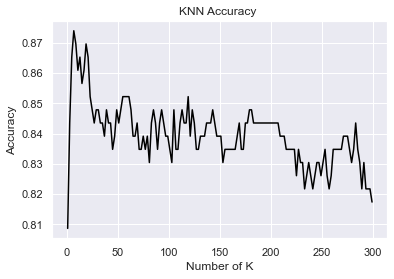

In [56]:
rate_set_kd = []
maxK = 301
for k in range(1,maxK): #迭代K
    if k % 2 == 1:
        # 创建KNN对象，进行训练与测试
        knc = KNeighborsClassifier(k)
        # 进行训练
        knc.fit(X_train, y_train)
        result_kd = knc.score(X_test, y_test)
        # 进行测试获得测试的结果
        rate_set_kd.append(result_kd)

# print(rate_set) 
max_acc_kd = np.max(rate_set_kd)  # max value index
min_acc_kd = np.min(rate_set_kd)  # min value index
mean_acc_kd = np.mean(rate_set_kd)  # mean
var_acc_kd = np.var(rate_set_kd) #var
print('最高准确率:',max_acc_kd,', k = ', 2* (rate_set_kd.index(max_acc_kd)+1) - 1, ', 最低准确率:', min_acc_kd,', k = ', 2* (rate_set_kd.index(min_acc_kd)+1) - 1, ',平均准确率:', mean_acc_kd,',方差:',var_acc_kd)

plt.figure()
plt.plot(range(1,maxK,2), rate_set_kd, color="black",lw=1.5)
plt.grid(True)
plt.title("KNN Accuracy ")
plt.xlabel("Number of K")
plt.ylabel("Accuracy")
plt.show()
